# Algerian forest fire model Training

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE_cleaned.csv')
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0


In [3]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
df.drop(['day', 'month', 'year'],axis=1, inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.Classes.value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [6]:
df.Classes= np.where(df.Classes.str.contains('not fire'),0,1)
df.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [7]:
X= df.drop(['FWI'], axis=1)
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [8]:
Y= df.FWI
Y.head(2)

0    0.5
1    0.4
Name: FWI, dtype: float64

__Train and Test Split__

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.25, random_state=42)

In [11]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

##### Feature selection based on correlation

In [12]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


heat map for corelation

<Axes: >

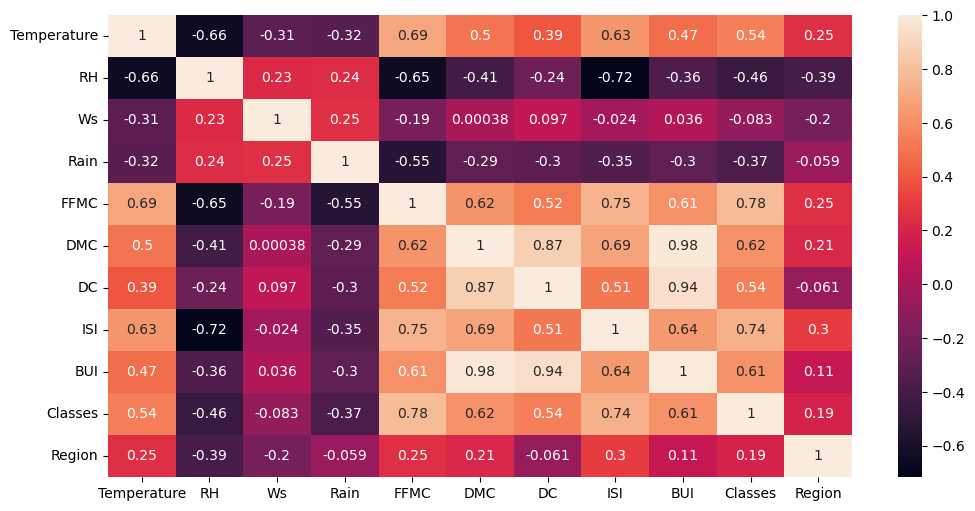

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(X_train.corr(), annot=True)

In [14]:
def corelation(dataset,threshold):
    corr_features= set()
    corr_matrix= dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                corr_features.add(corr_matrix.columns[i])
    
    return corr_features

Threshold for correlation should be decided by the __Domain Expert__

In [15]:
# the threshold feature is set as .85
threshold_features=corelation(dataset=X_train, threshold=0.85)
threshold_features

{'BUI', 'DC'}

Dropping the features with correlation more than 0.85

In [16]:
X_train.drop(threshold_features, axis=1, inplace=True)
X_test.drop(threshold_features, axis=1, inplace=True)

In [17]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

### Feature Scaling Or Standardization

In [18]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [19]:
X_train_scaler= scaler.fit_transform(X_train)
X_test_scaler= scaler.transform(X_test)

In [20]:
X_test_scaler

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

### Box plot understand the effect of Standard Scaler

Text(0.5, 1.0, 'After scaling the data')

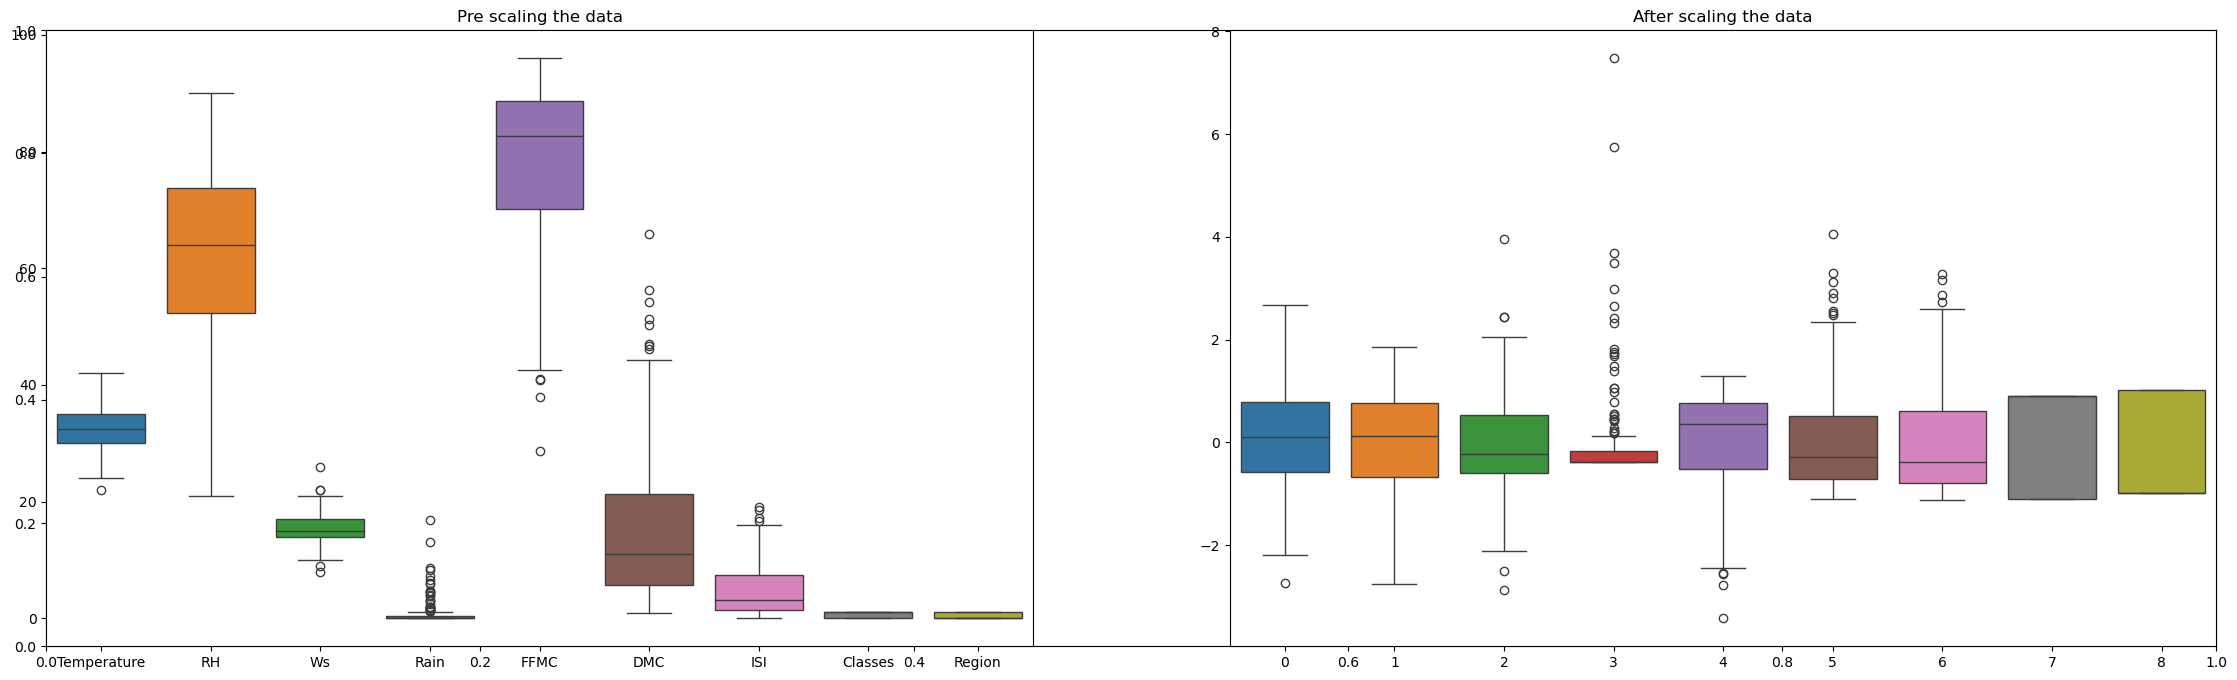

In [21]:
plt.subplots(figsize=(28,8))

plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Pre scaling the data')

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaler)
plt.title("After scaling the data")

### Linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [23]:
linear= LinearRegression().fit(X=X_train_scaler, y=Y_train)
y_pred= linear.predict(X_test_scaler)

In [24]:
mae= mean_absolute_error(y_pred=y_pred,y_true=Y_test)
r2=r2_score(y_pred=y_pred, y_true=Y_test)
print('Mean Absolute Error(MAE): ', mae)
print('R square score: ', r2)

Mean Absolute Error(MAE):  0.5468236465249993
R square score:  0.9847657384266951


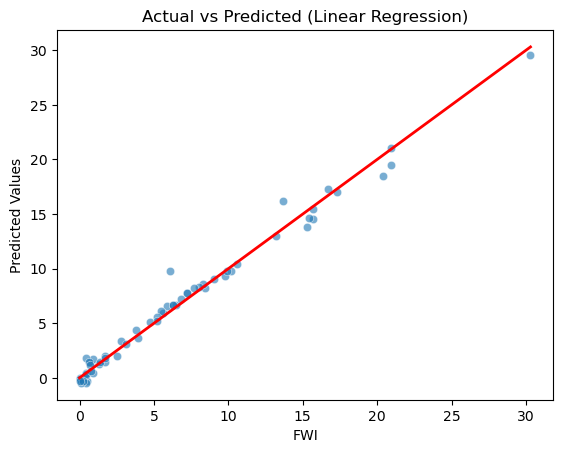

In [25]:
sns.scatterplot(x=Y_test, y=y_pred, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 
         color='red', lw=2, linestyle='-')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Linear Regression)')
plt.show()

### Lasso Regression


In [26]:
from sklearn.linear_model import Lasso

In [27]:
lasso= Lasso().fit(X=X_train_scaler, y=Y_train)
y_pred= lasso.predict(X_test_scaler)
print("Mean Absolute Error: ", mean_absolute_error(y_pred=y_pred, y_true=Y_test))
print("R square score: ", r2_score(y_pred=y_pred, y_true=Y_test))

Mean Absolute Error:  1.1331759949144087
R square score:  0.9492020263112388


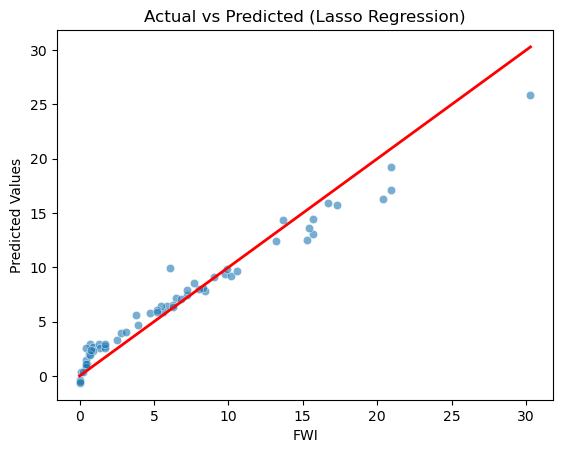

In [28]:
sns.scatterplot(x=Y_test, y=y_pred, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 
         color='red', lw=2, linestyle='-')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Lasso Regression)')
plt.show()

### Cross Validation Lasso

In [29]:
from sklearn.linear_model import LassoCV
lasso_cv= LassoCV(cv=5).fit(X=X_train_scaler, y=Y_train)


In [30]:
lasso_cv.alpha_

np.float64(0.06582808719529475)

In [31]:
lasso_cv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [32]:
lasso_cv.mse_path_

array([[54.04680834, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139504, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

In [33]:
y_pred=lasso_cv.predict(X=X_test_scaler)
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_pred=y_pred, y_true= Y_test))
print('R Squire Score: ', r2_score(y_pred=y_pred, y_true= Y_test))

Mean Absolute Error (MAE):  0.6358894638564663
R Squire Score:  0.9814406737205228


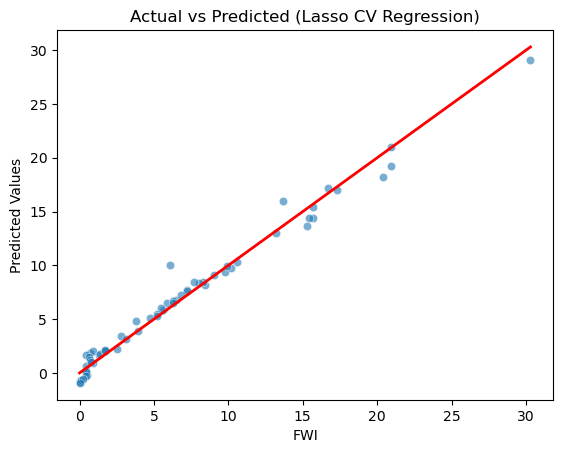

In [34]:
sns.scatterplot(x=Y_test, y=y_pred, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 
         color='red', lw=2, linestyle='-')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Lasso CV Regression)')
plt.show()

### Ridge Regression Model

In [35]:
from sklearn.linear_model import Ridge
ridge= Ridge().fit(X=X_train_scaler, y=Y_train)

In [36]:
y_pred= ridge.predict(X=X_test_scaler)
print('Mean Absolute Error:', mean_absolute_error(y_pred=y_pred,y_true=Y_test))
print('R Square Score: ', r2_score(y_pred=y_pred, y_true=Y_test))

Mean Absolute Error: 0.5642305340105718
R Square Score:  0.9842993364555513


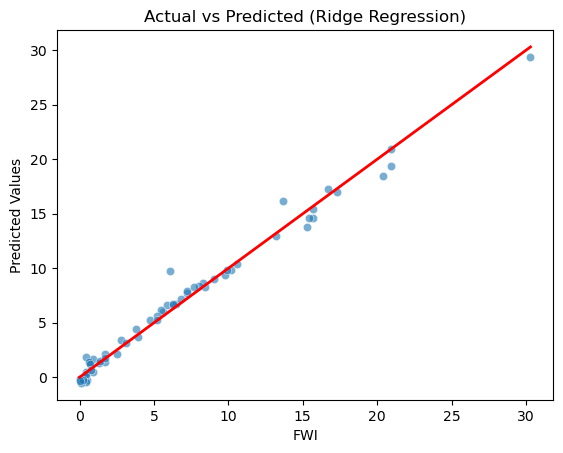

In [37]:
sns.scatterplot(x=Y_test, y=y_pred, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 
         color='red', lw=2, linestyle='-')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Ridge Regression)')
plt.show()

### ElasticNet Regression Model

In [38]:
from sklearn.linear_model import ElasticNet
elastic= ElasticNet().fit(X=X_train_scaler, y=Y_train)

In [39]:
y_pred= elastic.predict(X=X_test_scaler)
print('Mean Absolute Error (MEA): ', mean_absolute_error(y_pred=y_pred, y_true=Y_test))
print('R Square Score: ', r2_score(y_pred=y_pred, y_true=Y_test))

Mean Absolute Error (MEA):  1.8822353634895999
R Square Score:  0.8753460589519703


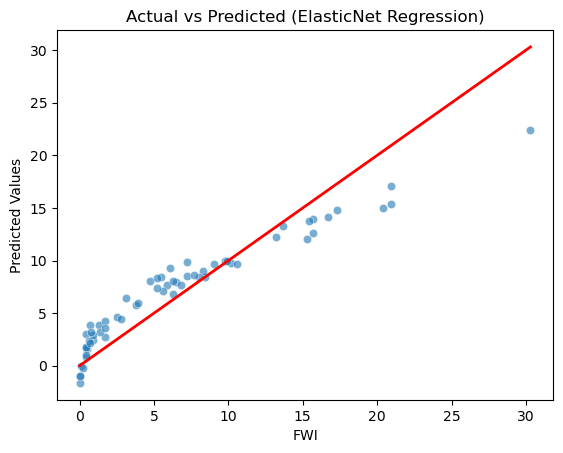

In [40]:
sns.scatterplot(x=Y_test, y=y_pred, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 
         color='red', lw=2, linestyle='-')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (ElasticNet Regression)')
plt.show()

### Cross Validation Ridge

In [41]:
from sklearn.linear_model import RidgeCV
ridge_cv= RidgeCV().fit(X=X_train_scaler, y=Y_train)

In [42]:
y_pred=ridge_cv.predict(X=X_test_scaler)
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_pred=y_pred, y_true=Y_test))
print('R Square Score: ', r2_score(y_pred=y_pred, y_true=Y_test))

Mean Absolute Error (MAE):  0.5642305340102783
R Square Score:  0.9842993364555414


In [43]:
ridge_cv.alpha_

1.0

In [44]:
ridge_cv.alphas

(0.1, 1.0, 10.0)

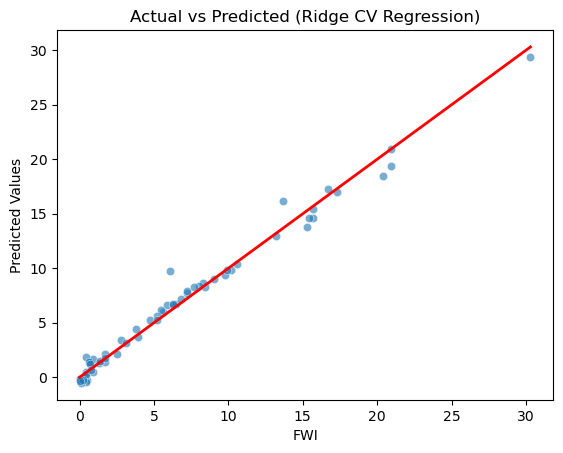

In [45]:
sns.scatterplot(x=Y_test, y=y_pred, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 
         color='red', lw=2, linestyle='-')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Ridge CV Regression)')
plt.show()

ElasticNet CV Regression Model

In [46]:
from sklearn.linear_model import ElasticNetCV
elastic_cv= ElasticNetCV(l1_ratio=0.3).fit(X=X_train_scaler, y=Y_train)

In [47]:
y_pred = elastic_cv.predict(X=X_test_scaler)
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_pred=y_pred, y_true=Y_test))
print('R Square Score: ', r2_score(y_pred=y_pred, y_true=Y_test))

Mean Absolute Error (MAE):  0.668166643421214
R Square Score:  0.9811306132852491


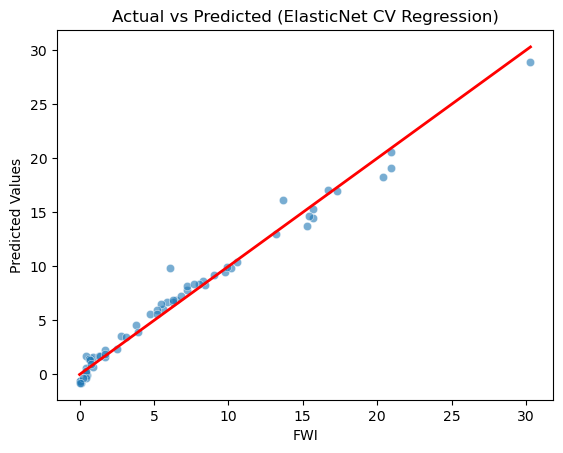

In [48]:
sns.scatterplot(x=Y_test, y=y_pred, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 
         color='red', lw=2, linestyle='-')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (ElasticNet CV Regression)')
plt.show()

In [49]:
elastic_cv.alpha_

np.float64(0.03834548396398656)

In [50]:
elastic_cv.alphas_

array([23.5284334 , 21.94269573, 20.46383148, 19.08463773, 17.79839702,
       16.59884463, 15.48013806, 14.43682856, 13.46383463, 12.55641724,
       11.71015674, 10.92093137, 10.18489715,  9.49846917,  8.85830414,
        8.26128409,  7.70450119,  7.18524359,  6.70098222,  6.24935845,
        5.82817261,  5.43537328,  5.06904731,  4.72741049,  4.40879884,
        4.11166056,  3.8345484 ,  3.57611267,  3.33509464,  3.11032043,
        2.90069524,  2.70519809,  2.52287679,  2.35284334,  2.19426957,
        2.04638315,  1.90846377,  1.7798397 ,  1.65988446,  1.54801381,
        1.44368286,  1.34638346,  1.25564172,  1.17101567,  1.09209314,
        1.01848971,  0.94984692,  0.88583041,  0.82612841,  0.77045012,
        0.71852436,  0.67009822,  0.62493584,  0.58281726,  0.54353733,
        0.50690473,  0.47274105,  0.44087988,  0.41116606,  0.38345484,
        0.35761127,  0.33350946,  0.31103204,  0.29006952,  0.27051981,
        0.25228768,  0.23528433,  0.21942696,  0.20463831,  0.19

### Polynomial Regression

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=2)
x_train_poly= poly.fit_transform(X_train)
x_test_poly= poly.transform(X_test)

In [52]:
from sklearn.pipeline import Pipeline

In [53]:
poly_regression= LinearRegression()

poly_regression.fit(X=x_train_poly,y=Y_train)
y_pred= poly_regression.predict(X=x_test_poly)
Score_r2_poly= r2_score(y_pred=y_pred, y_true=Y_test)
print(Score_r2_poly)

0.9946173868349636


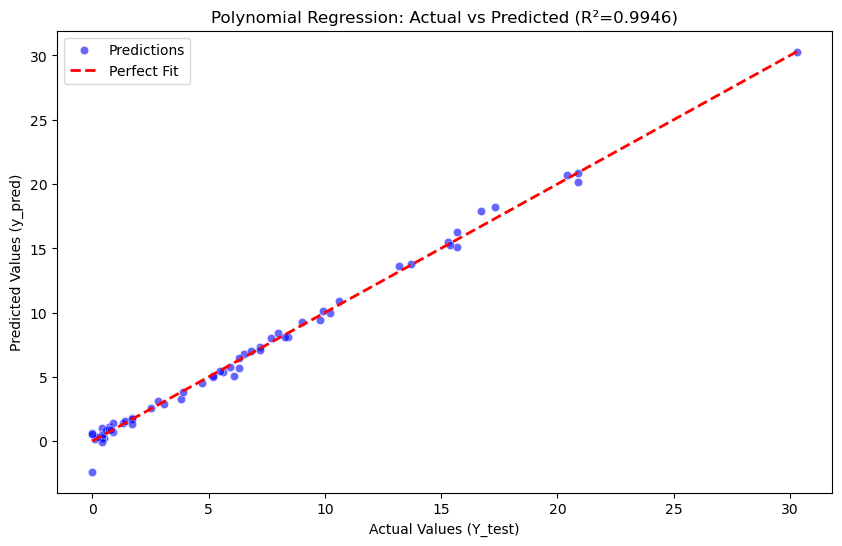

In [54]:
plt.figure(figsize=(10, 6))

# Plotting Actual vs Predicted
sns.scatterplot(x=Y_test, y=y_pred, alpha=0.6, color='blue', label='Predictions')

# Diagonal line representing perfect prediction
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 
         color='red', linestyle='--', lw=2, label='Perfect Fit')

plt.title(f'Polynomial Regression: Actual vs Predicted (R²={Score_r2_poly:.4f})')
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.show()

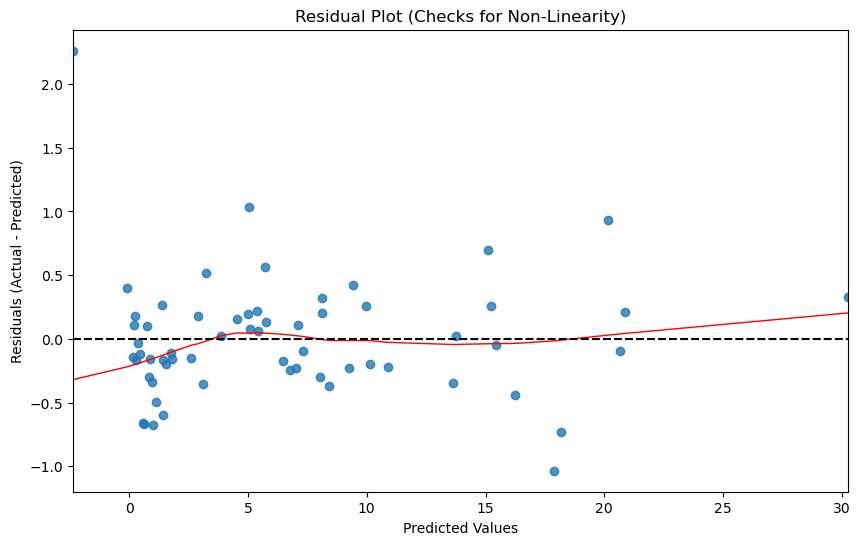

In [55]:
plt.figure(figsize=(10, 6))
residuals = Y_test - y_pred

# Plotting the residuals
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})

plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Checks for Non-Linearity)')
plt.show()

/home/deep/anaconda3/envs/ml-learn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


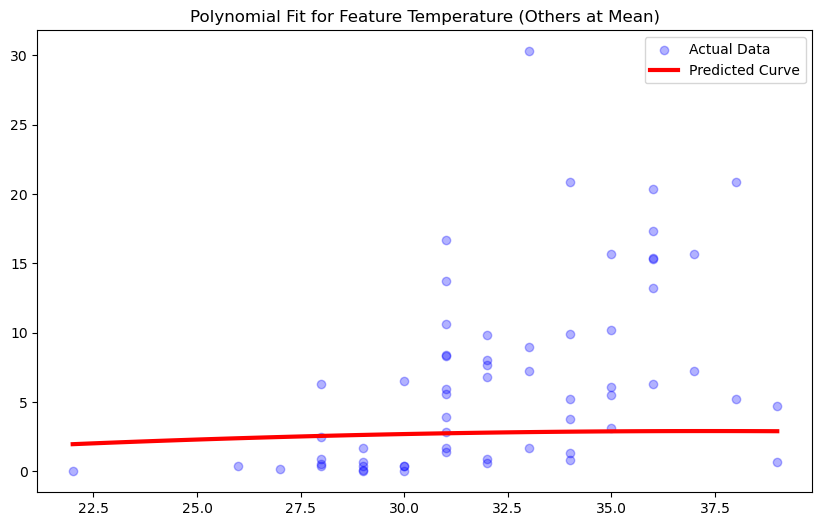

In [56]:
feature_idx = 0 
x_range_single = np.linspace(X_test.iloc[:, feature_idx].min(), 
                             X_test.iloc[:, feature_idx].max(), 100)

# 2. Create a dummy matrix of 9 columns filled with the mean of your test data
X_dummy = np.tile(X_test.mean().values, (100, 1))

# 3. Replace the chosen column with your range
X_dummy[:, feature_idx] = x_range_single

# 4. Transform and Predict
X_dummy_poly = poly.transform(X_dummy) # Now has 9 columns as expected
y_range_pred = poly_regression.predict(X_dummy_poly)

# 5. Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test.iloc[:, feature_idx], Y_test, color='blue', alpha=0.3, label='Actual Data')
plt.plot(x_range_single, y_range_pred, color='red', lw=3, label='Predicted Curve')
plt.title(f'Polynomial Fit for Feature {X_test.columns[feature_idx]} (Others at Mean)')
plt.legend()
plt.show()

the data is is quite linear in nature there is no need for a polynomial regression

#### Pickling the model (Saving)

In [59]:
scaler.get_feature_names_out()

array(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region'], dtype=object)

In [60]:
import pickle
pickle.dump(scaler, open('scaler.pkl','wb'))
pickle.dump(ridge, open('ridge.pkl','wb'))
